# ML:Anomaly/Outlier/Novelty Detection - 2

In [4]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)  # rcParams is a dictionary-like object provided by Matplotlib that allows you to customize various default settings for your plots.

In [5]:
from sklearn.neighbors import LocalOutlierFactor # for next class
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [6]:
df = pd.read_csv('Data_ AnomalyDetection.csv') 

In [7]:
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


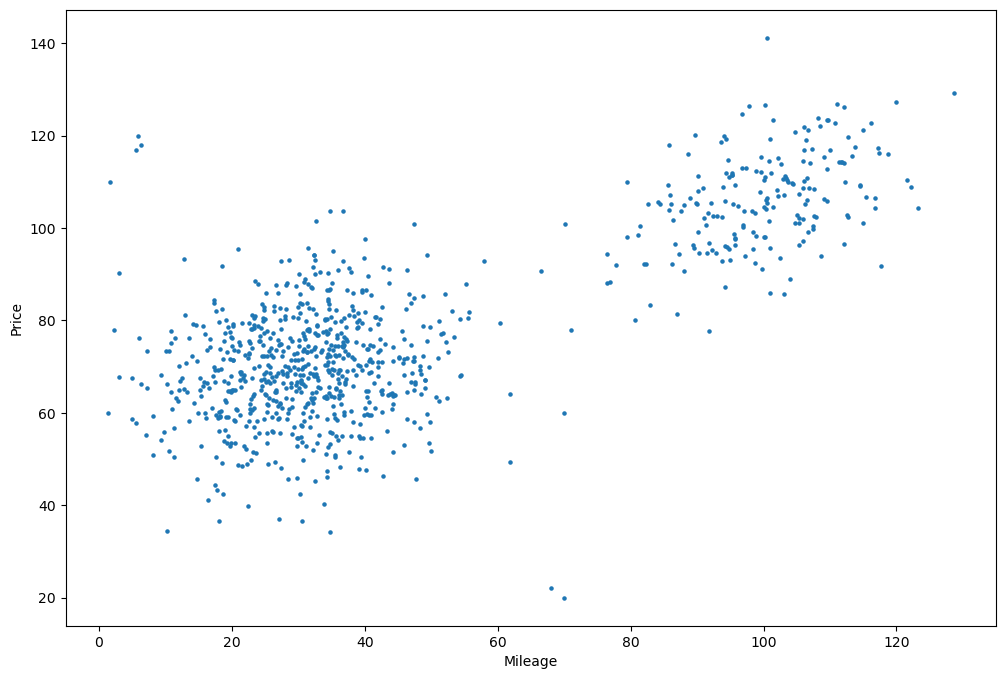

In [8]:
plt.scatter(df['Mileage'],df['Price'], s=5)  # s is for marker size.
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Price has been scaled where 20 could mean 20k and 120k could mean 1lakh 20 thousand.<br>
Mileage is on the x-axis. Mileage of above 80 seems off. Maybe these are electric vehicles. Their mileage is not measured on km/litre, it's measured as number of km per charge.

Ideally, this should not have been the data that we use for these technique. <br>
This is because it's not one single distribution. There are two clusters here.<br>
Ideally, it should have been one eliptical shaped data as shown below and anything outside the elipse would have been an outlier.

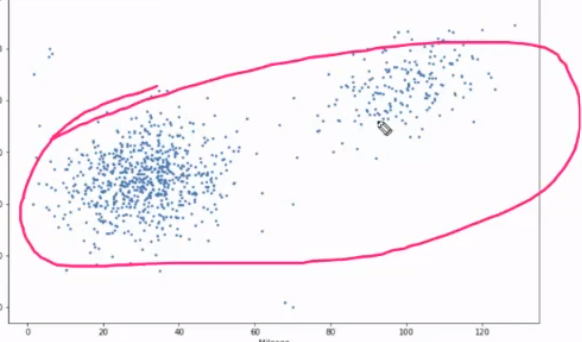

Since, the distribution is not that clean, we might not find a very good eliptical shape for this data.<br>
DBSCAN would work well here.

### Eliptical Envelope

In [9]:
# Contamination is not the probability. Since, probability based cut off could be very tough. 
# Very subjective. One person would choose 0.001, another would choose 0.0001 as cut-off, it's tough. 
# So, to reduce that complexity, contamination was introduced which is -> "what is the percentage of observations that we want to see as outliers."

label = EllipticEnvelope(random_state=0, contamination=0.01).fit_predict(df)    # 1% contamination
df['is_outlier_ee'] = label

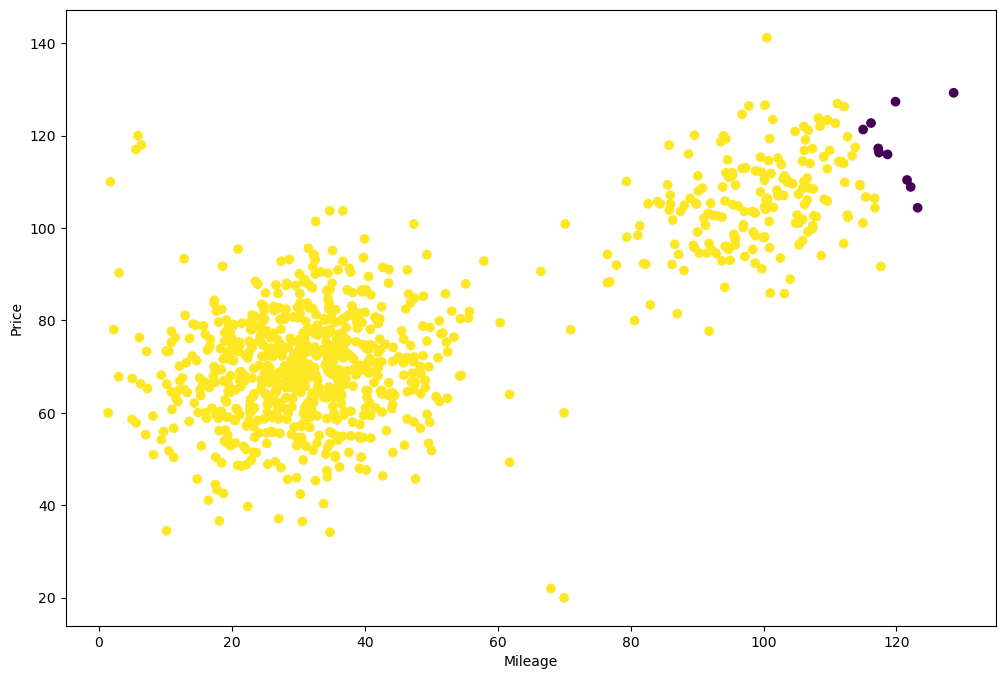

In [10]:
# Plotting
plt.scatter(df['Mileage'], df['Price'], c=df['is_outlier_ee']) # color of each marker will be determined by the corresponding value in the df['is_outlier_ee'] column.
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show() 

It has identified 1% of the observations as outliers.

Below is probably the elipse that it has created. Those observations outside the elipse, it has identified as outliers.

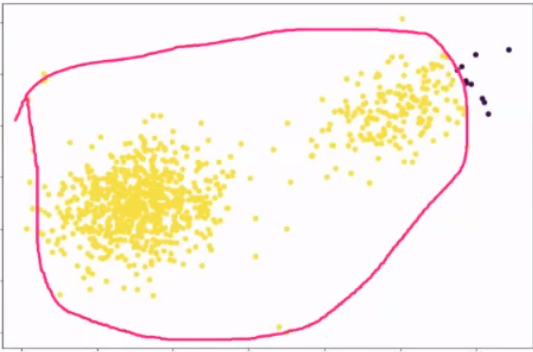

Let's change the contamination to 0.5% -> mark 5% of the observations as outliers.

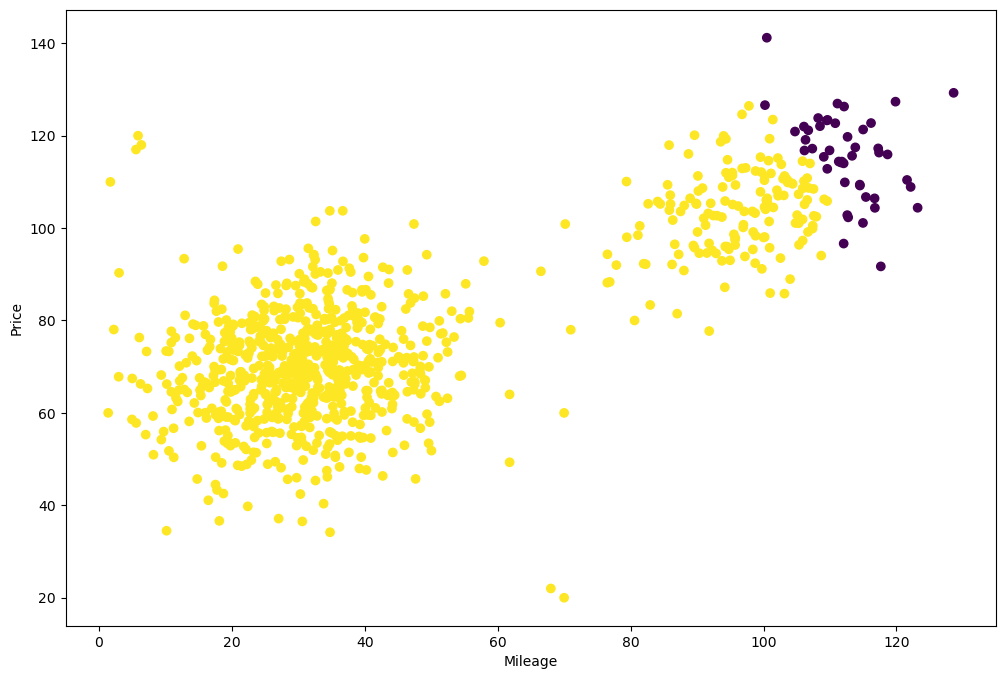

In [11]:
label = EllipticEnvelope(random_state=0, contamination=0.05).fit_predict(df)    # 5% contamination
df['is_outlier_ee'] = label

# Plotting
plt.scatter(df['Mileage'], df['Price'], c=df['is_outlier_ee']) 
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show() 

As you can see, there's a significant change in this now. These purple points are outliers and anomalies.<br>
Which point is an anomaly or an outlier has to be checked using the business context.

Notice that in the below image, value in the middle is an anomaly. <br>
Looks very off for a petrol based vehicles in the left clusters and also, looks off for electric based vehicles in the right cluster.<br>
Pricing is high, mileage is moderate. Neither close to any of the clusters. <br>
Can we call this an anamoly? It could be very old electric vehicle. The mileage for it significantly fell down.<br>
This point isn't getting detected since the Eliptic Envelope only works on single cluster.

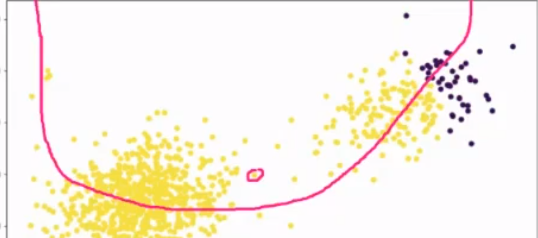

### How does it work?

mu1 and mu2 are the actual means of the bivariate distribution. With this mu1 and mu2, let's say it might have created an eliptical boundary like below:

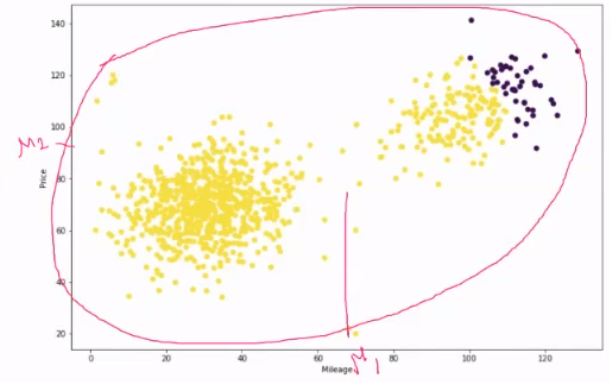

We started taking samples of this and we created a sampling distribution wrt. x1(ie. mu1) and a sampling distribution wrt. x2(ie. mu2).
<br>mu1 has a sampling distribution and it has a avg mean of 55, mu2 has a sampling distribution with avg mean of 65.

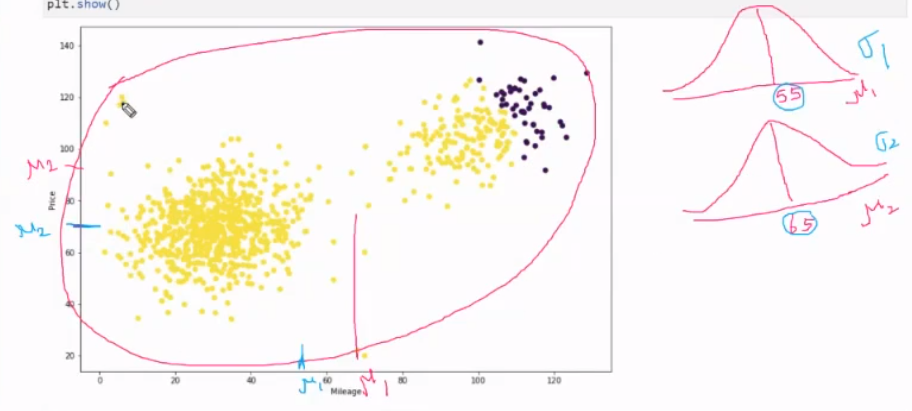

Based on the new mu1 and mu2, the elipse becomes like this:

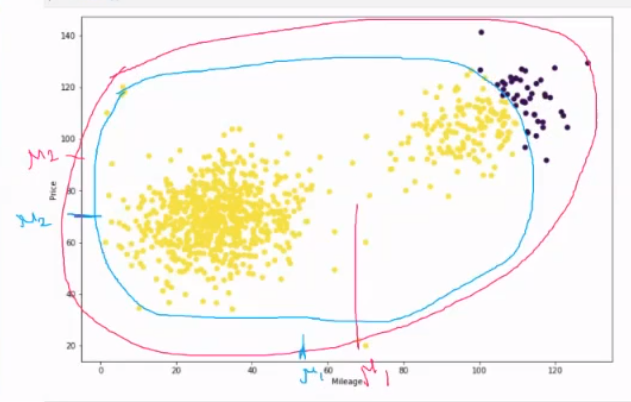

Outside this new elipse, are the outliers.

How did the blue elipse com?
1. Taking multiple samples
2. For each sample, calculate the mean of the sampled data points.
3. Using probability density function (pdf) of the bivariate distribution, it created that elipse.

### Using Less Dense Data:

In [12]:
less_dense = df.loc[df['Mileage'] <= 80]

In [13]:
less_dense.head()

,Mileage,Price,is_outlier_ee
0,54.282388,67.967708,1
1,17.331911,70.023637,1
2,36.548113,68.080455,1
3,42.567541,71.058755,1
4,5.608853,57.822432,1


In [14]:
less_dense.shape

(716, 3)

C:\Users\khush\AppData\Local\Temp\ipykernel_6436\1306379115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_dense['is_outlier_ee'] = label


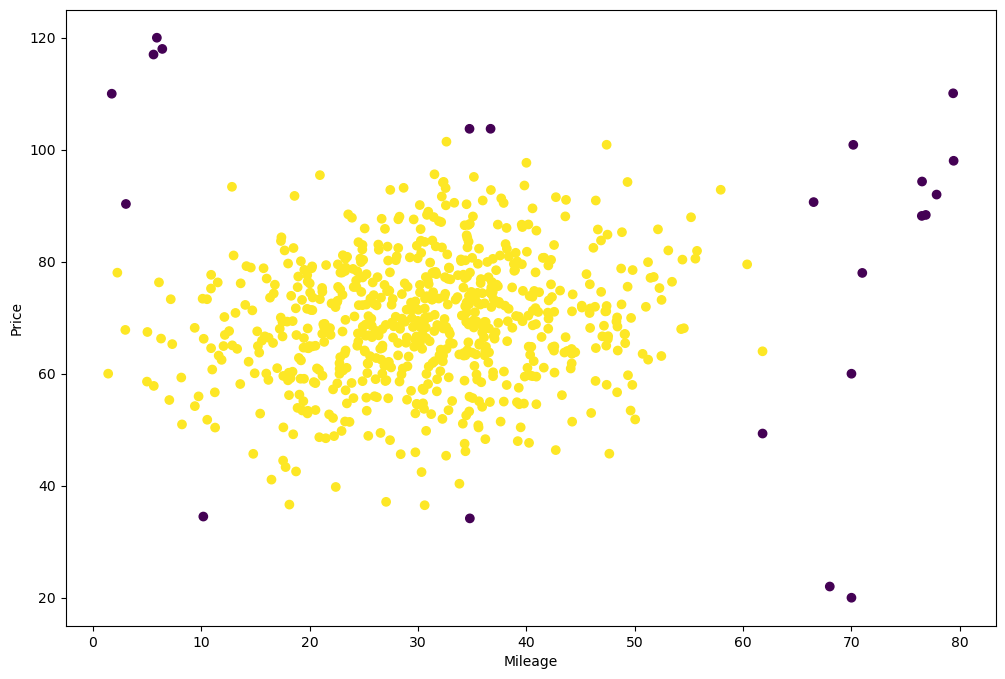

In [15]:
label = EllipticEnvelope(random_state=0, contamination=0.03).fit_predict(less_dense.iloc[:,:2])  # :2 for only taking the first two columns, not is_outlier_ee
less_dense['is_outlier_ee'] = label

# Plotting
plt.scatter(less_dense['Mileage'], less_dense['Price'], c=less_dense['is_outlier_ee'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Ellipse would look like:

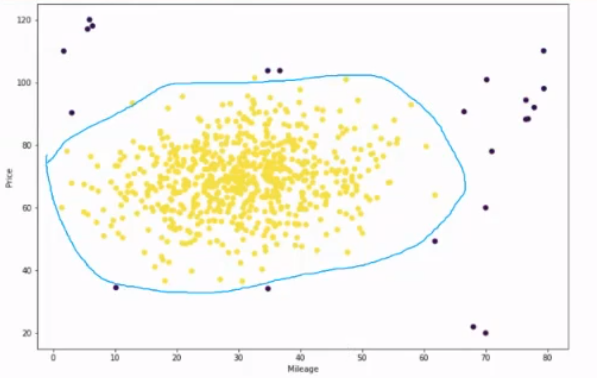

Here's the explanation:

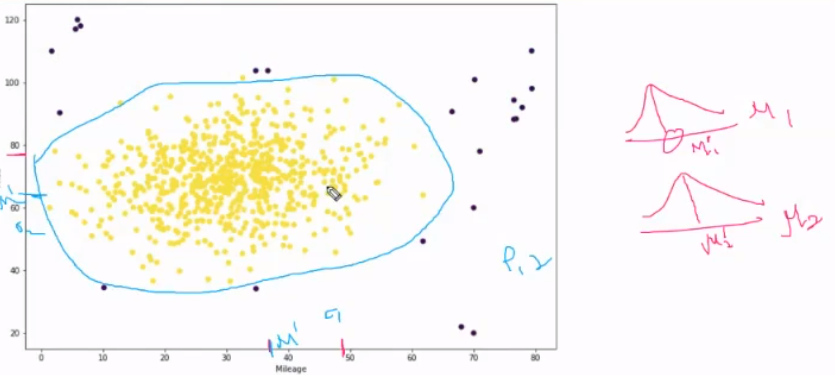

### Isolation Forest

C:\Users\khush\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


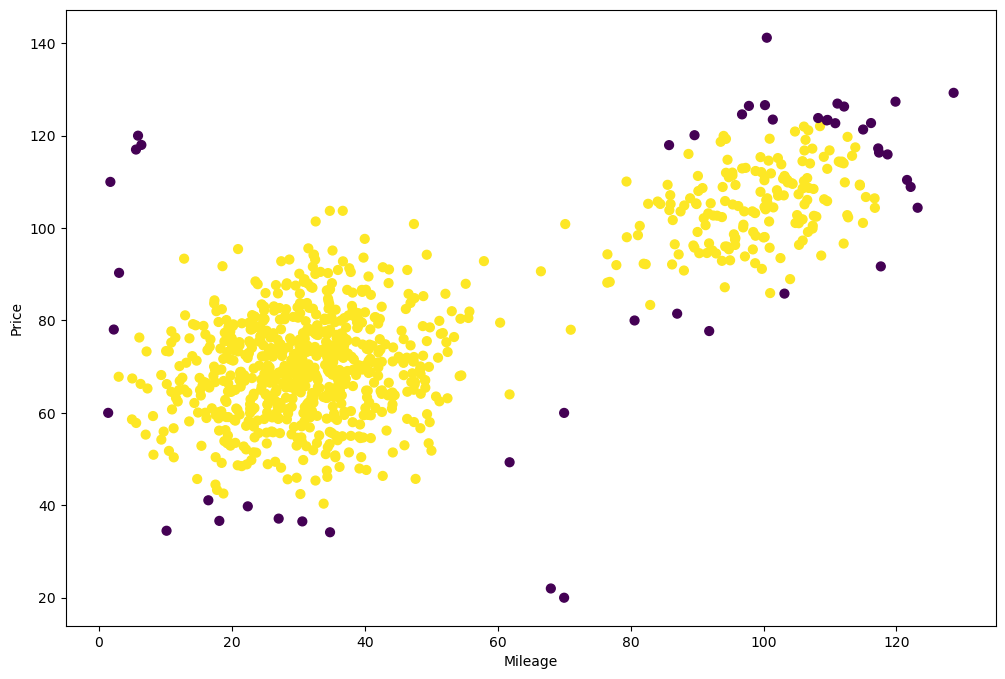

In [16]:
# n_estimators -> sets the number of decision trees (estimators) that the Isolation Forest algorithm will build.

clf = IsolationForest(contamination = 0.05, random_state=0, n_estimators=1000).fit_predict(df.iloc[:, :2])  

df['is_outlier_if'] = clf
plt.scatter(df['Mileage'], df['Price'], s=40, c=df['is_outlier_if'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

It's much more cleaner in finding out the outliers.<br>
Elliptic Envelope suffered because there were two clusters present.<br>
Maybe DBSCAN could also do better job on this dataset.

C:\Users\khush\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


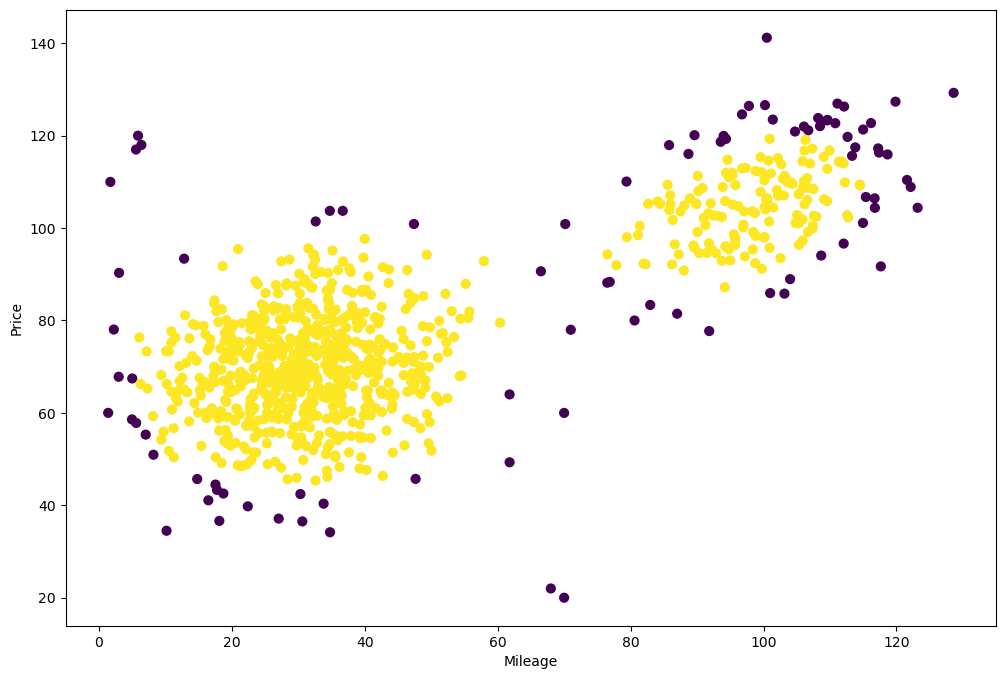

In [26]:
clf = IsolationForest(contamination = 0.1, random_state=0, n_estimators=1000).fit_predict(df.iloc[:, :2])   # increasing contamination to 10%

df['is_outlier_if'] = clf
plt.scatter(df['Mileage'], df['Price'], s=40, c=df['is_outlier_if'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Now, the points that were off between the two clusters have also been detected.<br>
Whether outlier or anomaly depends on the business. 

For a below data point wrt to the other features, it looks off, that's we call it as anomaly.

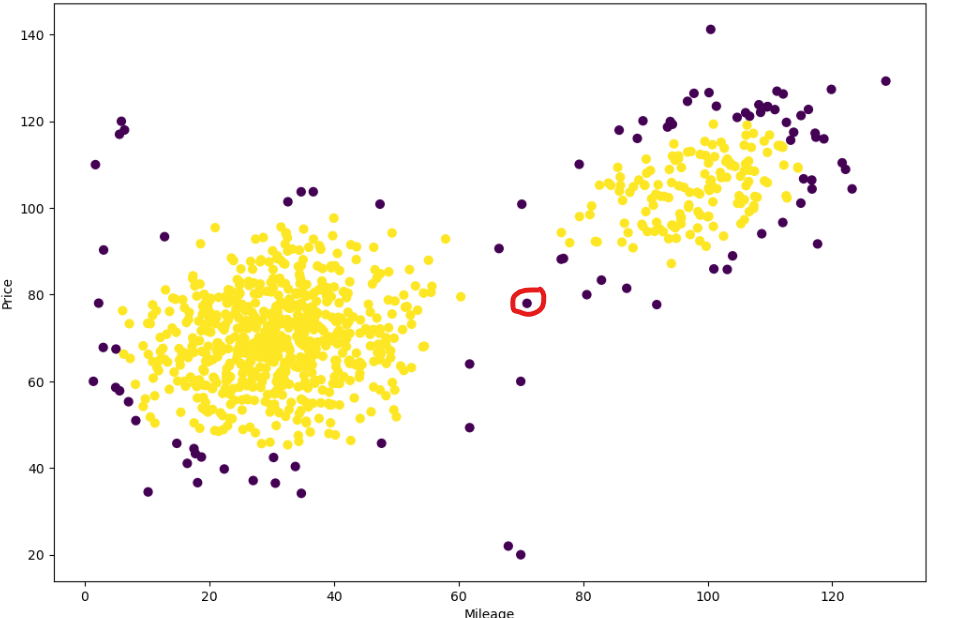

In [28]:
clf = IsolationForest(contamination = 0.1, random_state=0, n_estimators=1000).fit(df.iloc[:, :2]) 

C:\Users\khush\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [29]:
clf.predict()  # there's a predict method. Isolation Forest is an online model.

TypeError: predict() missing 1 required positional argument: 'X'

--- 
---

# Local Outlier Factor

What are the hyperparameters here?
1. **Contamination** -> because we don't know the cutoff, it's difficult to decide a cutoff. We may say LoF > 2, LoF > 2.5, LoF > 3.. which one to take? Don't know!
2. **k -> ideal number of nearest neighbors**

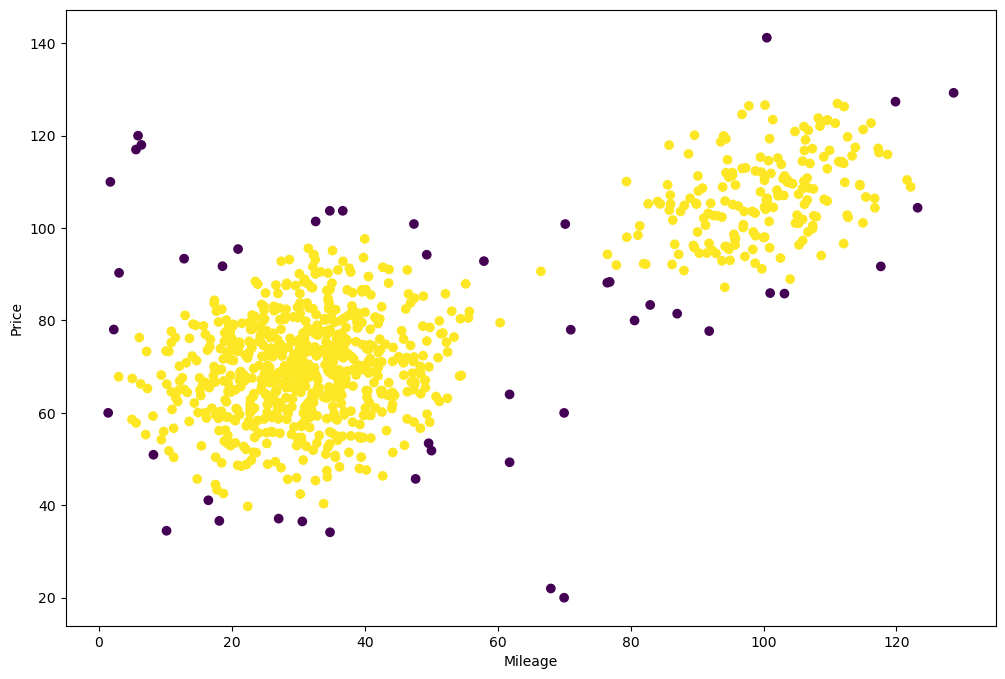

In [20]:
clf = LocalOutlierFactor(n_neighbors=25, contamination=0.05).fit_predict(df.iloc[:, :2])


df['is_outlier_lof'] = clf
plt.scatter(df['Mileage'], df['Price'], c=df['is_outlier_lof'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

It has identified outliers quite well.

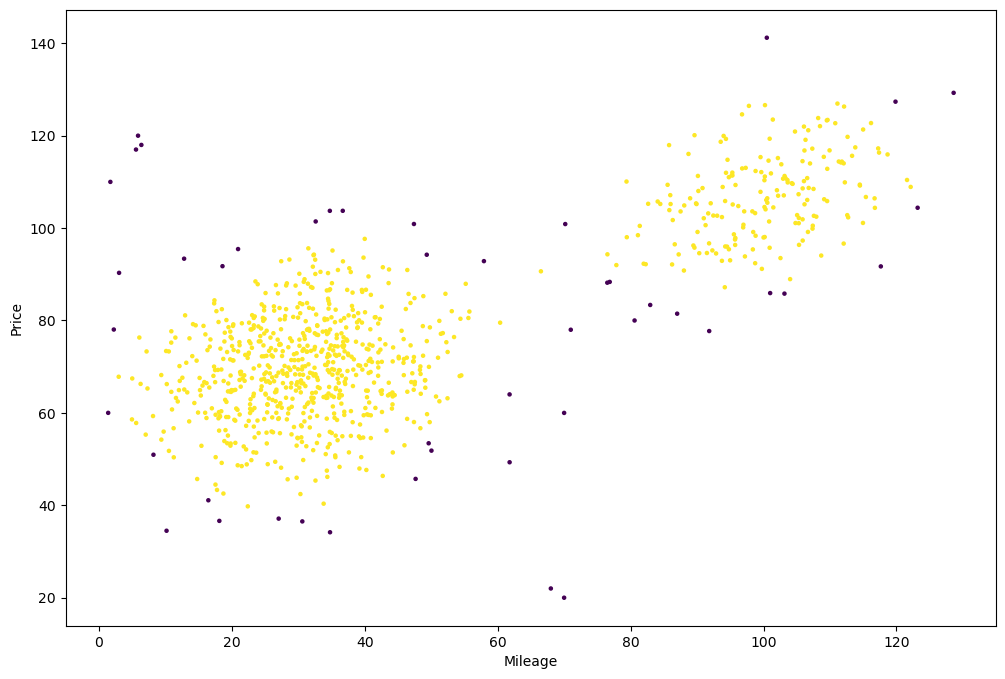

In [21]:
# Let's decrease the size of the points.
clf = LocalOutlierFactor(n_neighbors=25, contamination=0.05).fit_predict(df.iloc[:, :2])


df['is_outlier_lof'] = clf
plt.scatter(df['Mileage'], df['Price'], c=df['is_outlier_lof'], s = 5)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In the cluster on left, density is high, outliers are very close to the cluster.<br>
In the cluster on the right, density is low, outliers are slightly far away from the clusters.

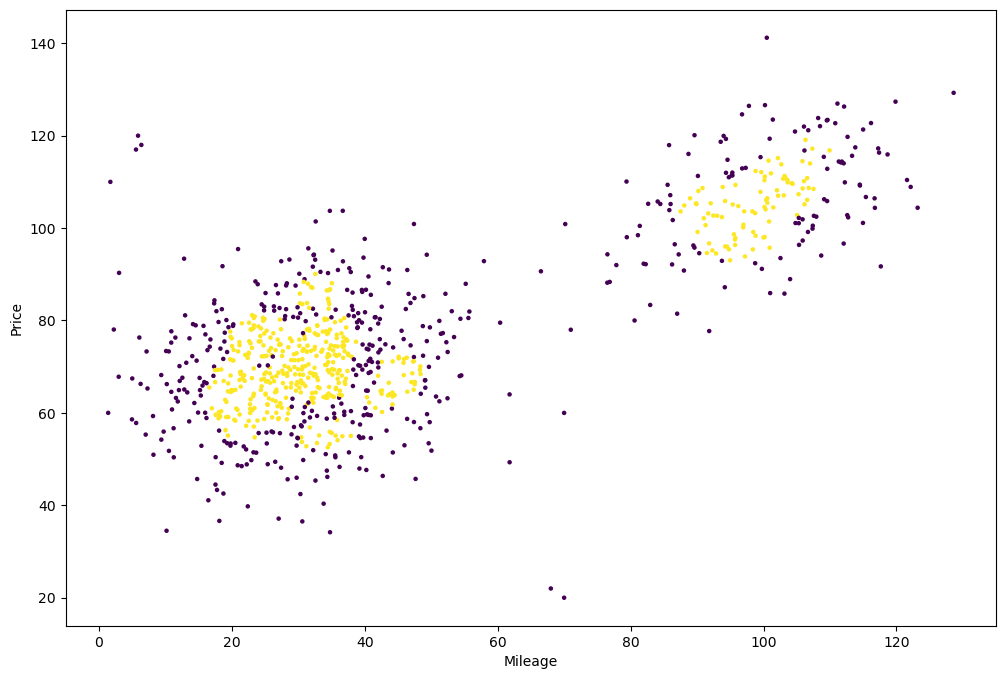

In [23]:
# Let's increase the contamination.
clf = LocalOutlierFactor(n_neighbors=25, contamination=0.5).fit_predict(df.iloc[:, :2])


df['is_outlier_lof'] = clf
plt.scatter(df['Mileage'], df['Price'], c=df['is_outlier_lof'], s = 5)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

It is trying to find outliers even within the clusters. No other algorithm could do that.

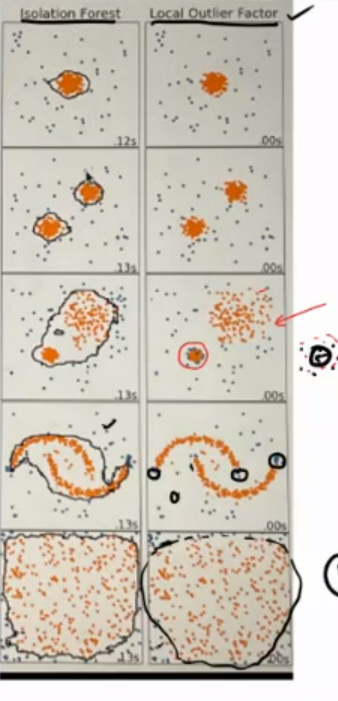

In [25]:
clf.predict() # LoF is an offline model. Hence, it doesn't have predict method.

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

**If you have any questions, get in touch with me here:**<br><br>
[Stalk and Support Me](https://linktr.ee/khushalkumar31)